In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import QuantileTransformer

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Semester 3/19AI403 _Intro to DS/Exp_6/Data_to_Transform.csv")
df

,Moderate Positive Skew,Highly Positive Skew,Moderate Negative Skew,Highly Negative Skew
0,0.899990,2.895074,11.180748,9.027485
1,1.113554,2.962385,10.842938,9.009762
2,1.156830,2.966378,10.817934,9.006134
3,1.264131,3.000324,10.764570,9.000125
4,1.323914,3.012109,10.753117,8.981296
...,...,...,...,...
9995,14.749050,16.289513,-2.980821,-3.254882
9996,14.854474,16.396252,-3.147526,-3.772332
9997,15.262103,17.102991,-3.517256,-4.717950
9998,15.269983,17.628467,-4.689833,-5.670496


In [ ]:
df.head()

,Moderate Positive Skew,Highly Positive Skew,Moderate Negative Skew,Highly Negative Skew
0,0.899990,2.895074,11.180748,9.027485
1,1.113554,2.962385,10.842938,9.009762
2,1.156830,2.966378,10.817934,9.006134
3,1.264131,3.000324,10.764570,9.000125
4,1.323914,3.012109,10.753117,8.981296


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Moderate Positive Skew  10000 non-null  float64
 1   Highly Positive Skew    10000 non-null  float64
 2   Moderate Negative Skew  10000 non-null  float64
 3   Highly Negative Skew    10000 non-null  float64
dtypes: float64(4)
memory usage: 312.6 KB


In [ ]:
df.describe()

,Moderate Positive Skew,Highly Positive Skew,Moderate Negative Skew,Highly Negative Skew
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,6.000000,6.000000,6.000000,6.000000
std,2.047237,1.882685,2.045060,1.860556
min,0.899990,2.895074,-6.335679,-7.036091
25%,4.518431,4.614818,4.779235,5.049961
50%,5.751642,5.634956,6.233932,6.360402
75%,7.258956,6.924035,7.465319,7.366753
max,16.204517,18.052331,11.180748,9.027485


In [ ]:
df.tail()

,Moderate Positive Skew,Highly Positive Skew,Moderate Negative Skew,Highly Negative Skew
9995,14.749050,16.289513,-2.980821,-3.254882
9996,14.854474,16.396252,-3.147526,-3.772332
9997,15.262103,17.102991,-3.517256,-4.717950
9998,15.269983,17.628467,-4.689833,-5.670496
9999,16.204517,18.052331,-6.335679,-7.036091


In [ ]:
df.shape

(10000, 4)

In [ ]:
df.columns

Index(['Moderate Positive Skew', 'Highly Positive Skew',
       'Moderate Negative Skew', 'Highly Negative Skew'],
      dtype='object')

In [ ]:
df.isnull().sum()

Moderate Positive Skew    0
Highly Positive Skew      0
Moderate Negative Skew    0
Highly Negative Skew      0
dtype: int64

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

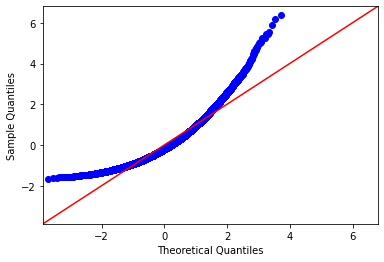

In [ ]:
sm.qqplot(df['Highly Positive Skew'],fit=True,line='45')
plt.show()

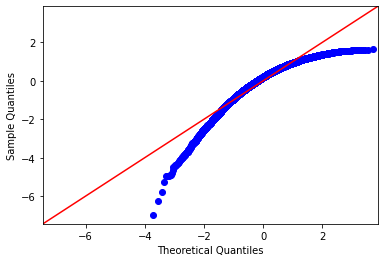

In [ ]:
sm.qqplot(df['Highly Negative Skew'],fit=True,line='45')
plt.show()

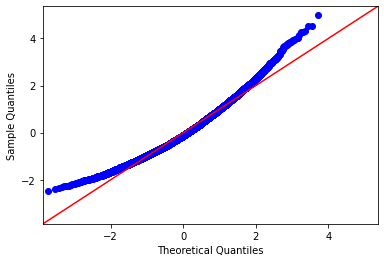

In [ ]:
sm.qqplot(df['Moderate Positive Skew'],fit=True,line='45')
plt.show()

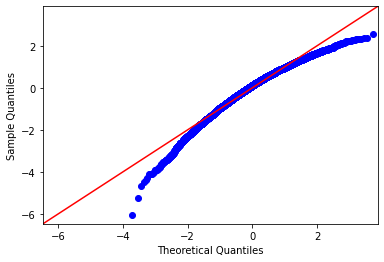

In [ ]:
sm.qqplot(df['Moderate Negative Skew'],fit=True,line='45')
plt.show()

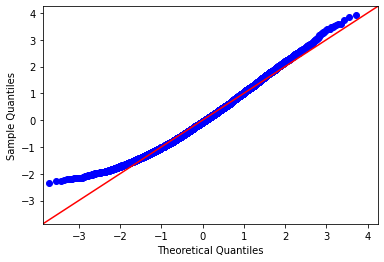

In [ ]:
df['Highly Positive Skew'] = np.log(df['Highly Positive Skew'])

sm.qqplot(df['Highly Positive Skew'],fit=True,line='45')
plt.show()

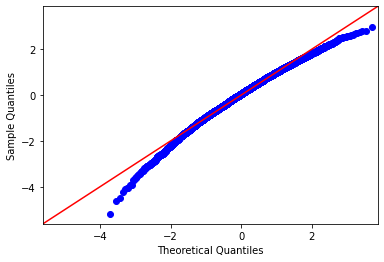

In [ ]:
df['Moderate Positive Skew'] = np.log(df['Moderate Positive Skew'])

sm.qqplot(df['Moderate Positive Skew'],fit=True,line='45')
plt.show()

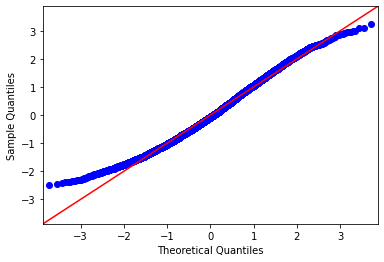

In [ ]:
df['Highly Positive Skew'] = 1/df['Highly Positive Skew']

sm.qqplot(df['Highly Positive Skew'],fit=True,line='45')
plt.show()

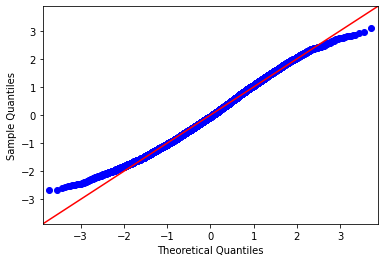

In [ ]:
df['Highly Positive Skew'] = df['Highly Positive Skew']**(1/1.2)

sm.qqplot(df['Highly Positive Skew'],fit=True,line='45')
plt.show()

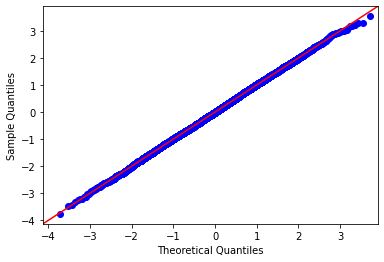

In [ ]:
df['Moderate Positive Skew_1'], parameters=stats.yeojohnson(df['Moderate Positive Skew'])

sm.qqplot(df['Moderate Positive Skew_1'],fit=True,line='45')
plt.show()

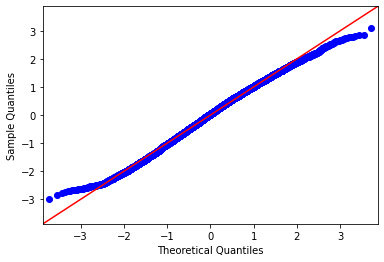

In [ ]:
from sklearn.preprocessing import PowerTransformer
transformer=PowerTransformer("yeo-johnson")

df['ModerateNegativeSkew_2']=pd.DataFrame(transformer.fit_transform(df[['Moderate Negative Skew']]))

sm.qqplot(df['ModerateNegativeSkew_2'],fit=True,line='45')
plt.show()

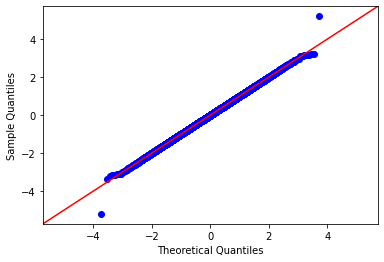

In [ ]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(output_distribution = 'normal')

df['ModerateNegativeSkew_2'] = pd.DataFrame(qt.fit_transform(df[['Moderate Negative Skew']]))

sm.qqplot(df['ModerateNegativeSkew_2'],fit=True,line='45')
plt.show()